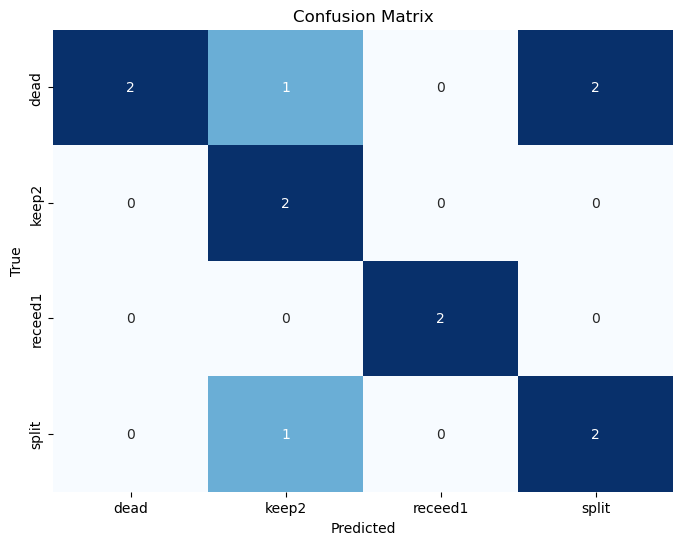

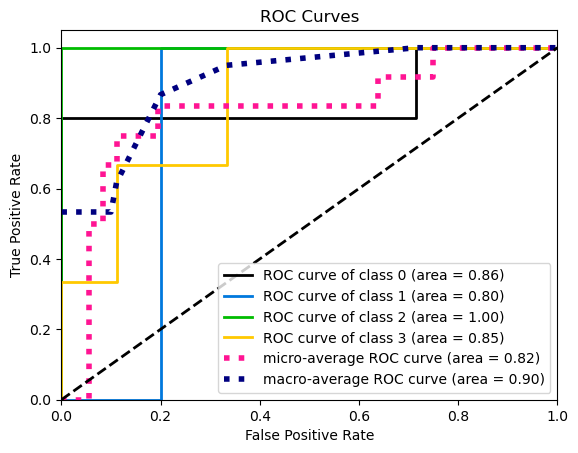

<Figure size 800x600 with 0 Axes>

Cross-Validation Scores: [0.8        0.77777778 0.44444444 0.55555556 0.77777778]
Mean CV Accuracy: 0.671111111111111
Test Set Accuracy: 0.6666666666666666


In [26]:
# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight

# Load data from a CSV file
data = pd.read_csv("C:/Users/Laurent/Documents/organoids-project/notebooks/statistics_features.csv")

# Assuming the last column is the label and the rest are features
X = data.iloc[:, 2:]
y = data.iloc[:, 1]
# Use a list for labels to ensure consistent order
unique_labels = []
seen = set()

for item in y.values:
    if item not in seen:
        unique_labels.append(item)
        seen.add(item)
        
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Calculate class weights to account for imbalance
class_weights = len(y) / (4 * np.bincount(y))

# Initialize the XGBoost classifier for multiclass classification
classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=4)

# Perform cross-validation with stratified sampling
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(classifier, X_train, y_train, cv=cv, scoring='accuracy')

# Train the model on the entire training set
sample_weights = compute_sample_weight(
    class_weight='balanced',
    y=y_train  # provide your own target name
)

classifier.fit(X_train, y_train, sample_weight=sample_weights)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix with custom labels
plt.figure(figsize=(8, 6))
# Specify your custom labels for both rows and columns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
y_prob = classifier.predict_proba(X_test)
# Your code was missing the plot for ROC curve
skplt.metrics.plot_roc(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Create ROC curve plot
plt.figure(figsize=(8, 6))
plt.show()

# Print cross-validation scores and accuracy
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Test Set Accuracy:", accuracy)


In [1]:
import cv2
import os
import matplotlib.pyplot as plt

def show_samples(image_dir, samples, title):
    num_misclassified = len(samples)
    
    # Define the number of rows and columns for subplots
    num_rows = 2
    num_cols = num_misclassified  # +1 to ensure at least 2 columns
    
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6))
    
    for i, misclassified_sample in enumerate(samples):
        folder_name, sample_name = misclassified_sample.split(' - ')

        # Load the original image
        image_path = os.path.join(image_dir, "z_projection", folder_name, sample_name)
        image = cv2.imread(image_path)
        if num_misclassified == 1:
            ax = axs[0]
        else:
            ax = axs[0, i % num_cols]  # Use modulo to handle multiple rows
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax.set_title(sample_name)
        ax.axis('off')

        # Load the labeled image (if named as "labeled_sample_name")
        labeled_sample_name = "labeled_" + sample_name
        image_path_labeled = os.path.join(image_dir, "labeled", folder_name, labeled_sample_name)
        labeled_image = cv2.imread(image_path_labeled)
        if num_misclassified == 1:
            ax = axs[1]
        else:
            ax = axs[1, i % num_cols]  # Use modulo to handle multiple rows
        ax.imshow(cv2.cvtColor(labeled_image, cv2.COLOR_BGR2RGB))
        ax.set_title(labeled_sample_name)
        ax.axis('off')
    
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()


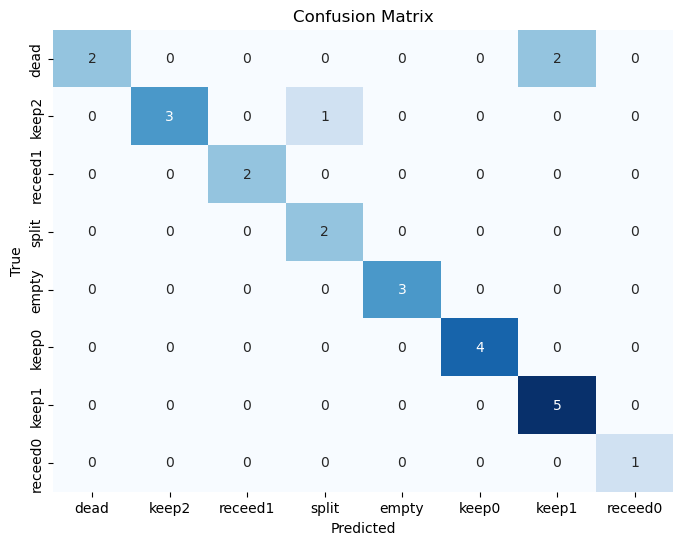

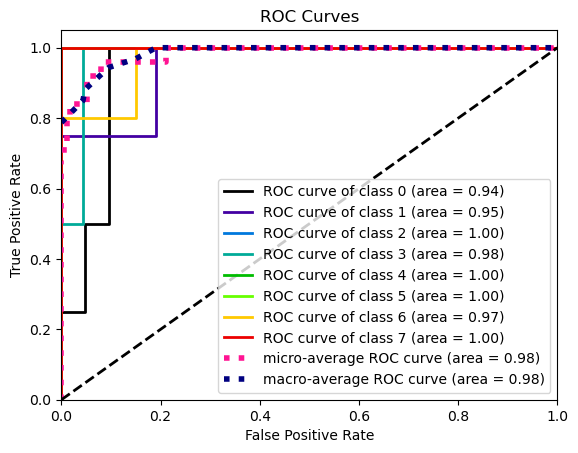

<Figure size 800x600 with 0 Axes>

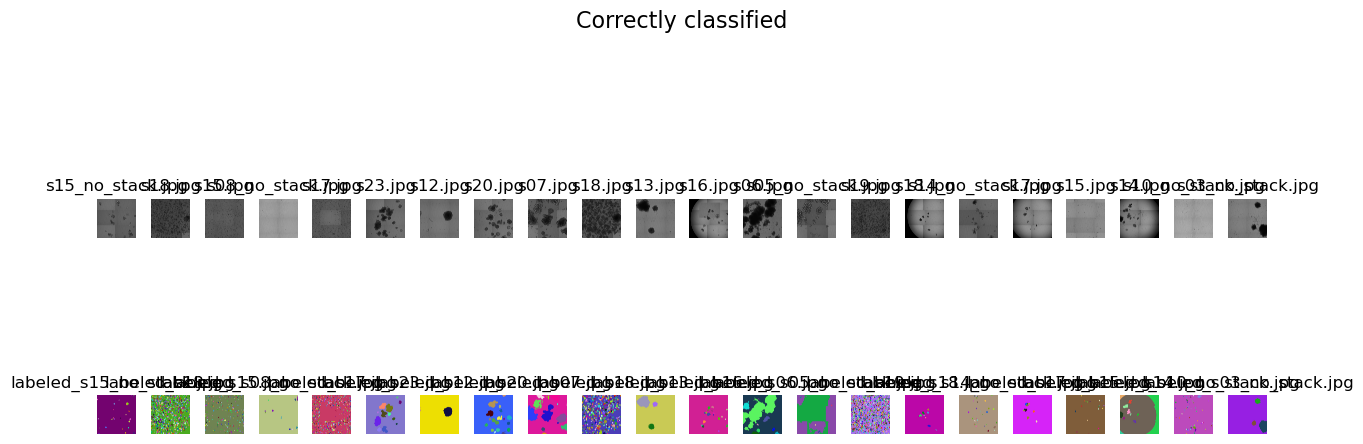

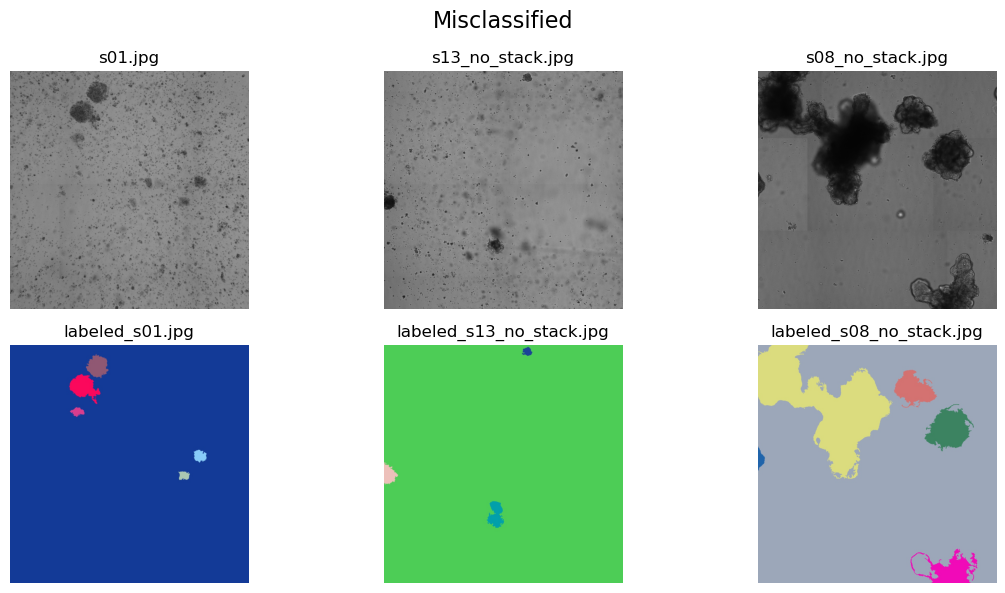

Misclassified Samples (Random State: 30):
14              dead - s01.jpg
13     dead - s13_no_stack.jpg
20    keep2 - s08_no_stack.jpg
dtype: object
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Test Set Accuracy (using best model): 1.0


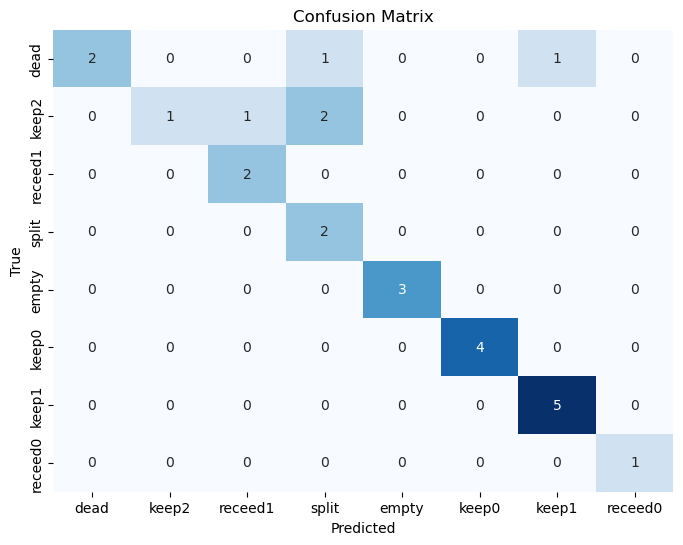

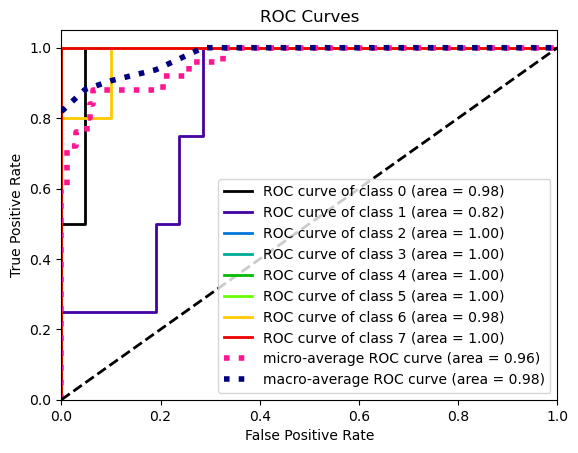

<Figure size 800x600 with 0 Axes>

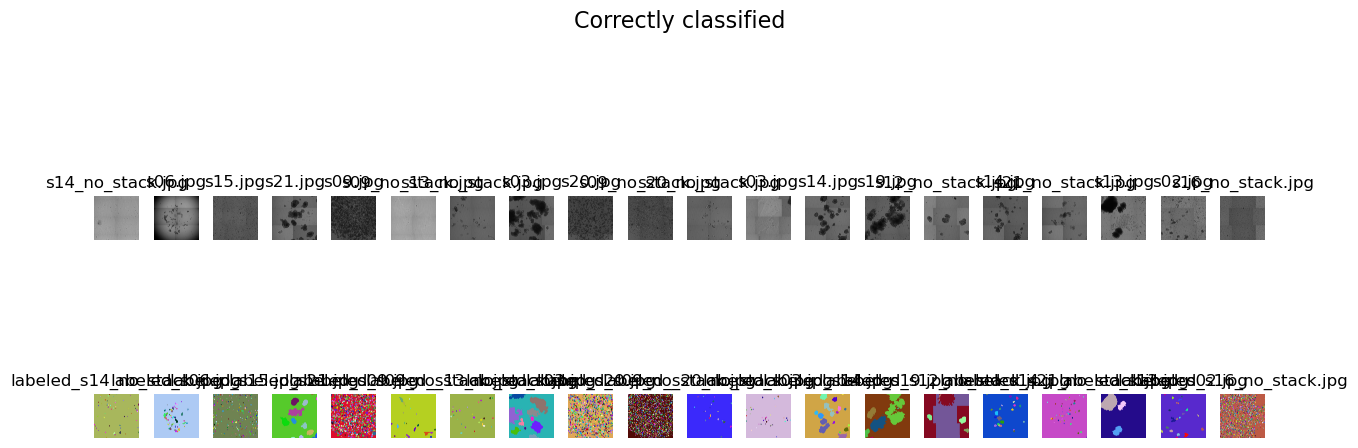

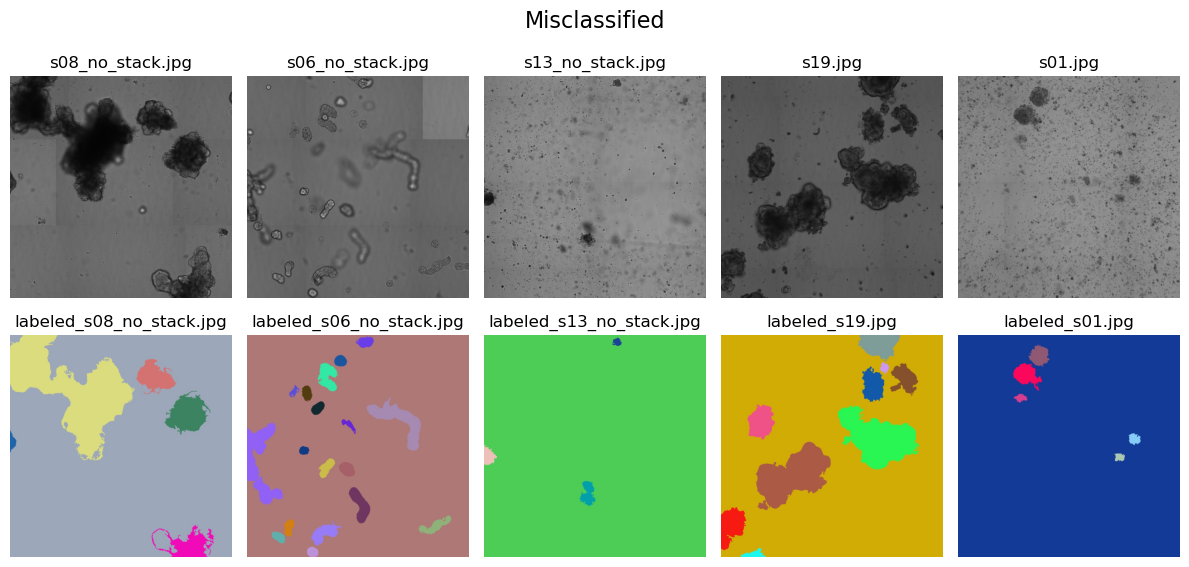

Misclassified Samples (Random State: 25):
20    keep2 - s08_no_stack.jpg
18    keep2 - s06_no_stack.jpg
13     dead - s13_no_stack.jpg
35             keep2 - s19.jpg
14              dead - s01.jpg
dtype: object
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Test Set Accuracy (using best model): 1.0


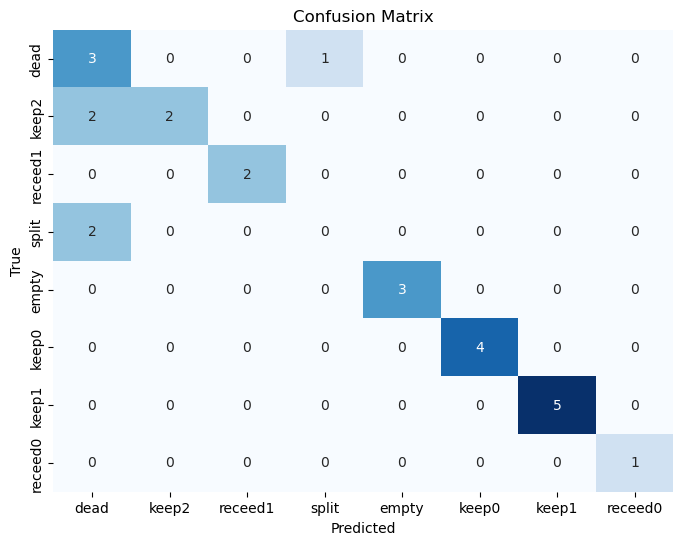

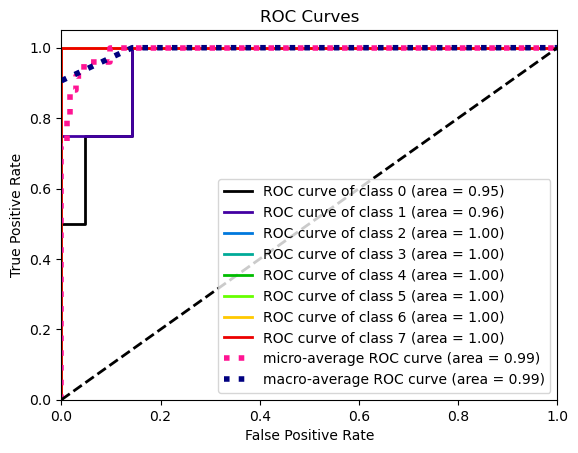

<Figure size 800x600 with 0 Axes>

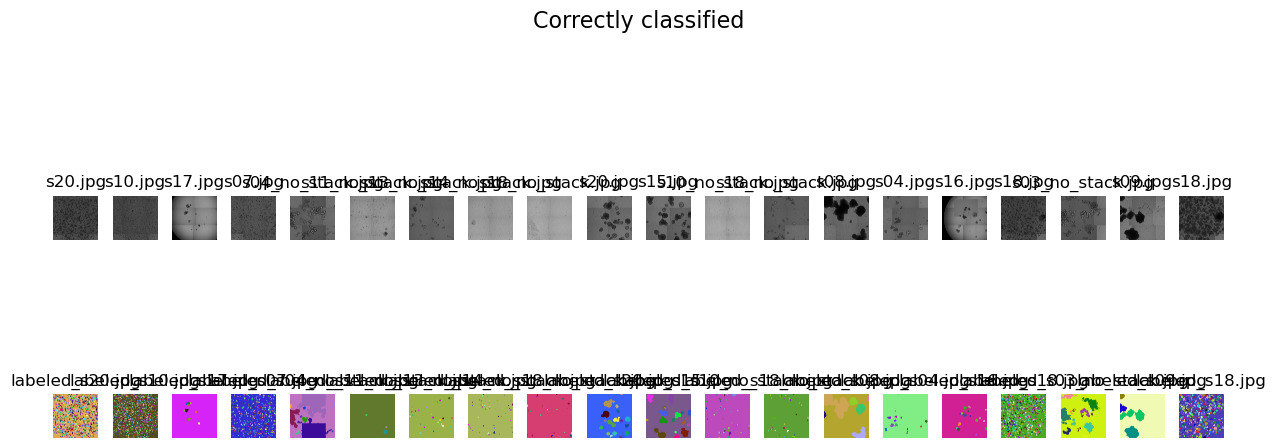

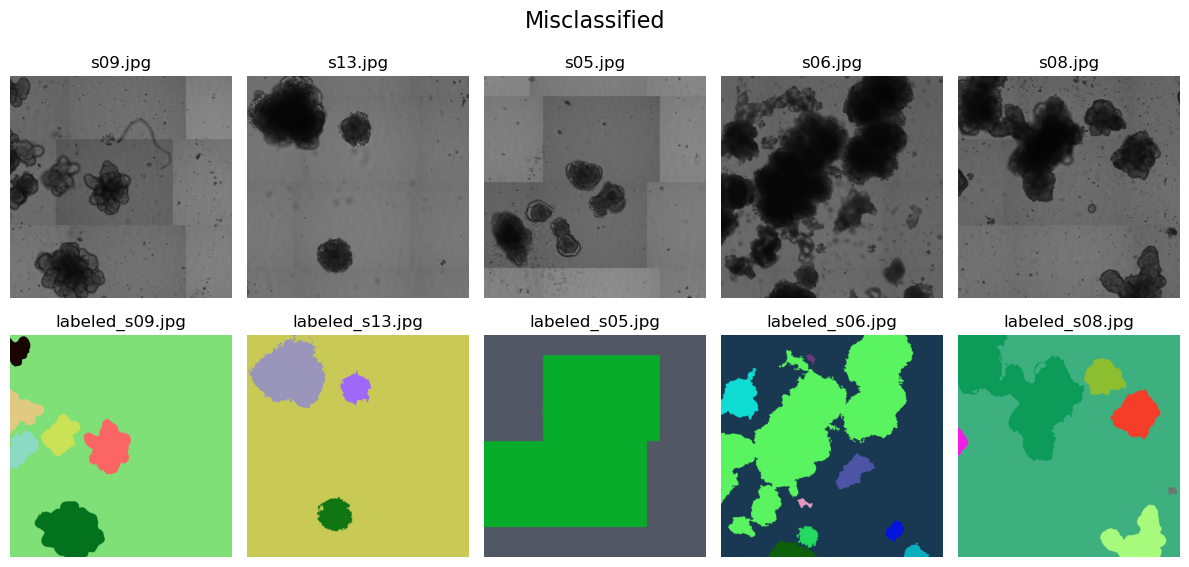

Misclassified Samples (Random State: 40):
34    keep2 - s09.jpg
55    split - s13.jpg
21    keep2 - s05.jpg
5      dead - s06.jpg
49    split - s08.jpg
dtype: object
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Test Set Accuracy (using best model): 1.0


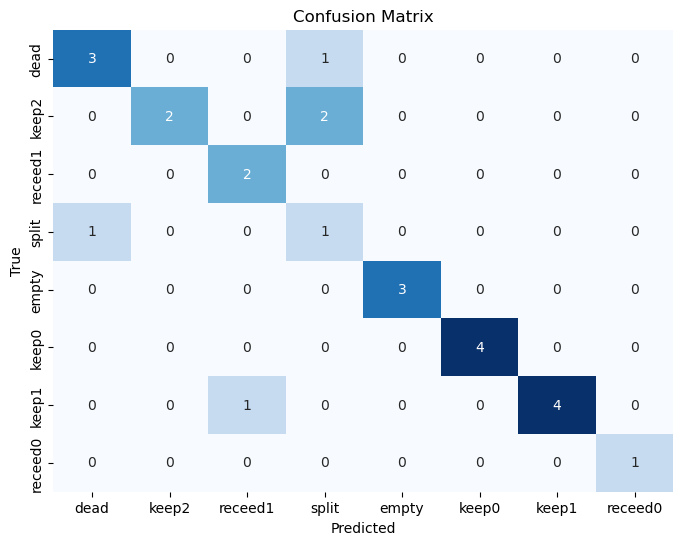

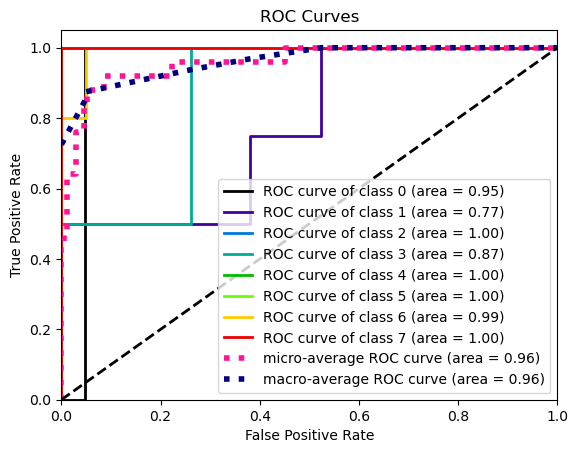

<Figure size 800x600 with 0 Axes>

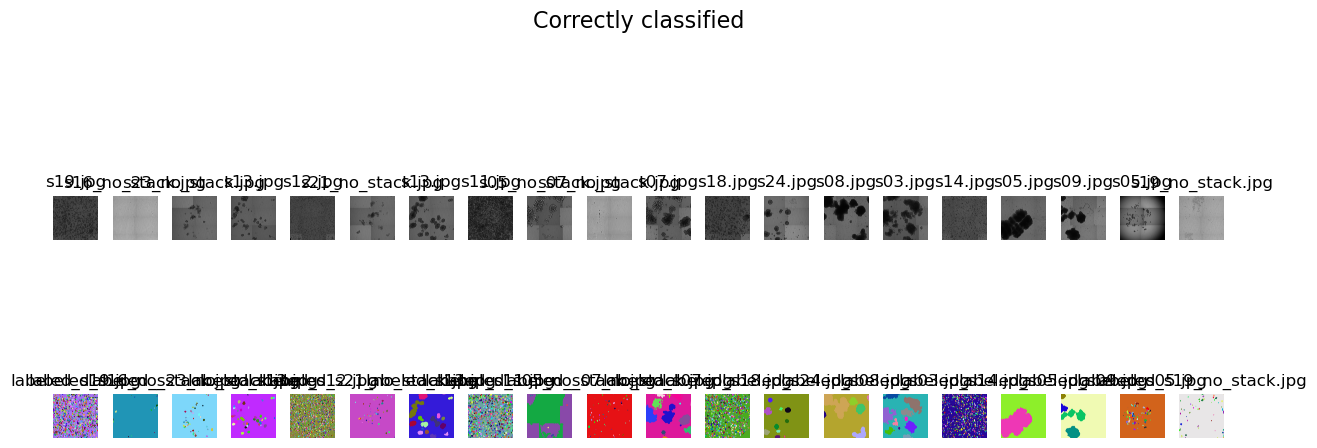

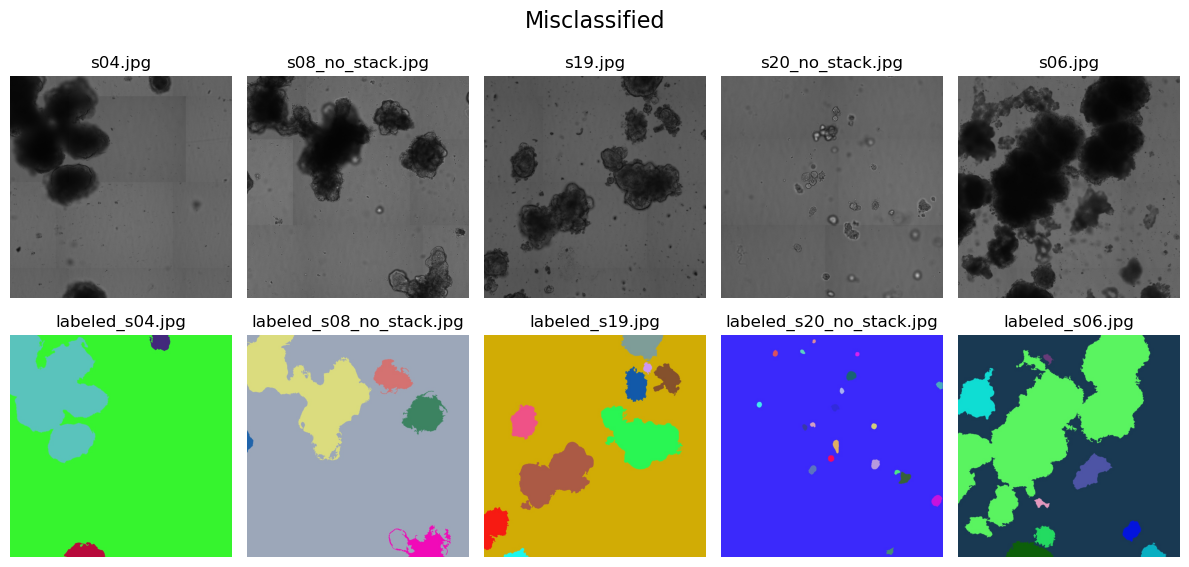

Misclassified Samples (Random State: 78):
47              split - s04.jpg
20     keep2 - s08_no_stack.jpg
35              keep2 - s19.jpg
105    keep1 - s20_no_stack.jpg
5                dead - s06.jpg
dtype: object
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Test Set Accuracy (using best model): 1.0


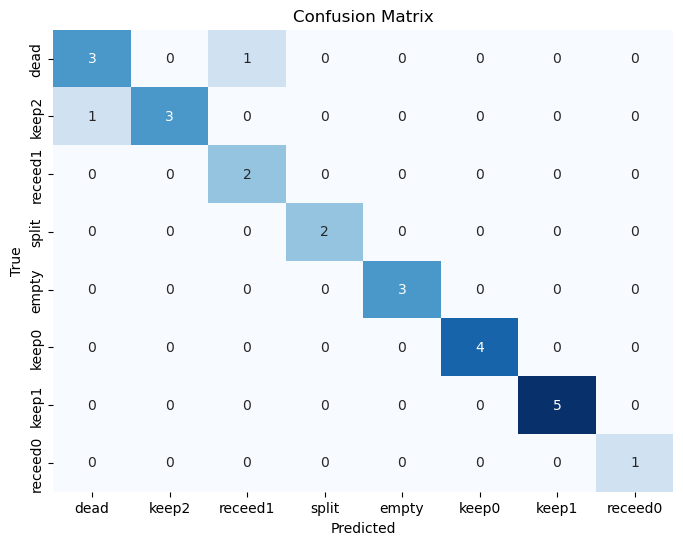

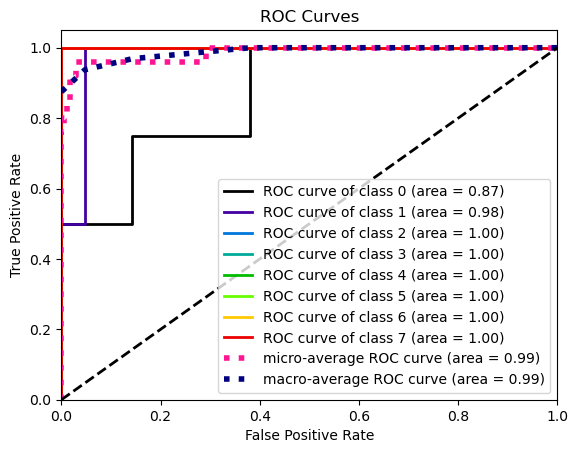

<Figure size 800x600 with 0 Axes>

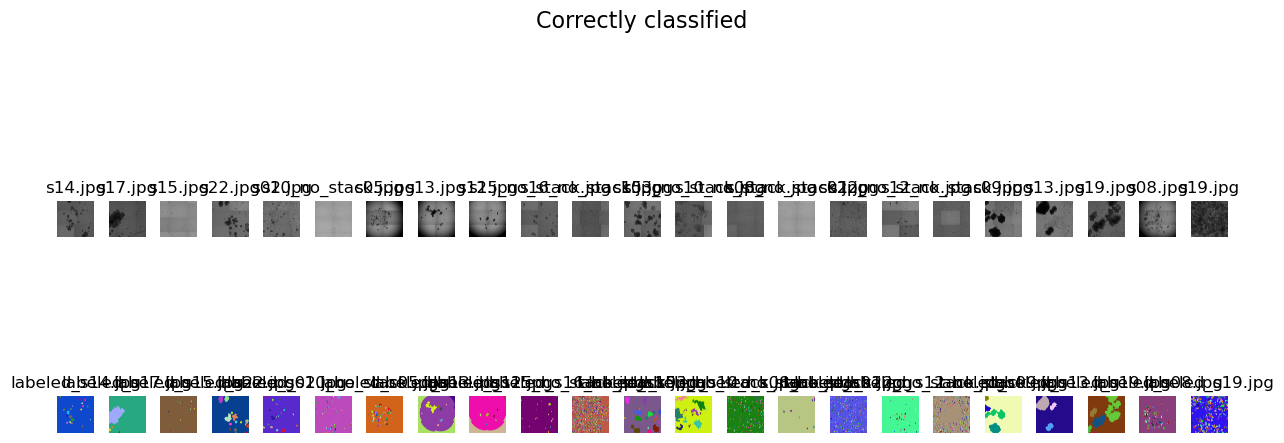

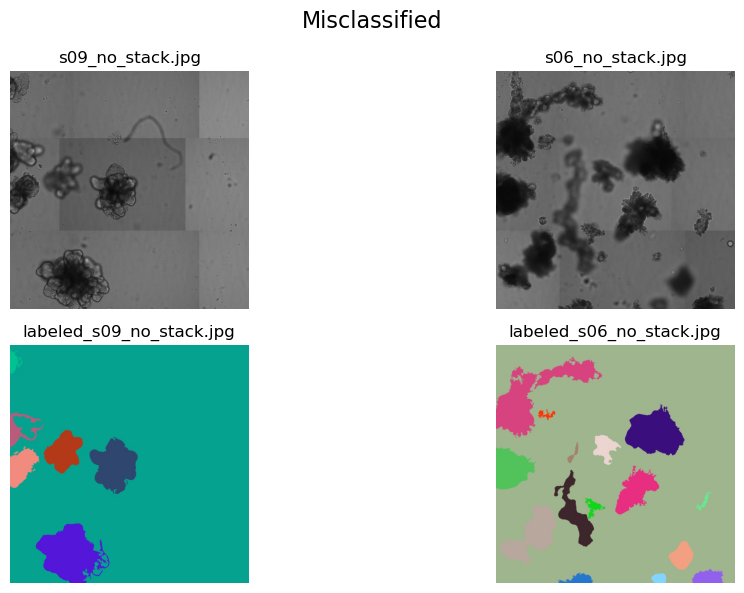

Misclassified Samples (Random State: 90):
33    keep2 - s09_no_stack.jpg
3      dead - s06_no_stack.jpg
dtype: object
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Test Set Accuracy (using best model): 1.0


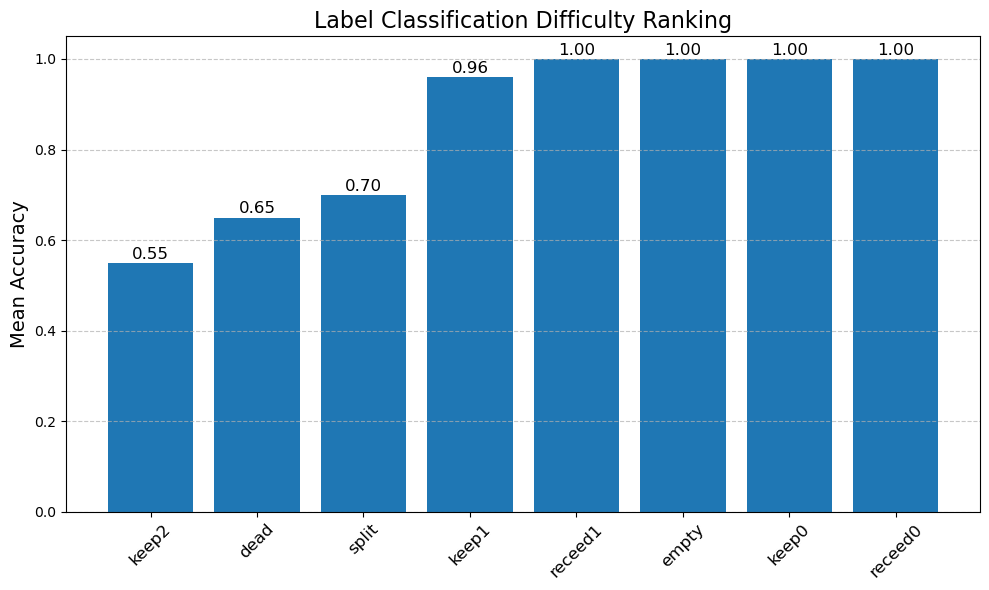

In [27]:
# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
import scikitplot as skplt

# Load data from a CSV file
data = pd.read_csv("E:/data_for_seg/statistics_features_test.csv")
# Assuming the last column is the label and the rest are features
X = data.iloc[:, 2:]
y = data.iloc[:, 1]
# Use a list for labels to ensure consistent order
unique_labels = []
seen = set()

for item in y.values:
    if item not in seen:
        unique_labels.append(item)
        seen.add(item)
        
# Extract unique labels and create a mapping from labels to integers
unique_labels = y.unique()
label_mapping = {label: i for i, label in enumerate(unique_labels)}

# Create a new Series for y with custom labels and the original indexes
y = y.map(label_mapping)

label_metrics = {}  # Dictionary to store label-wise metrics

# Specify different random states
random_states = [30, 25, 40, 78, 90]  # Add more random states if needed

for random_state in random_states:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
    # Calculate class weights to account for imbalance
    class_weights = len(y) / (len(unique_labels) * np.bincount(y))
    
    best_params = {
        'learning_rate': 0.01, 
        'max_depth': 3, 
        'n_estimators': 100, 
        'subsample': 0.8
    }

    # Initialize the XGBoost classifier for multiclass classification
    classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(unique_labels), **best_params)

    # Train the model on the entire training set
    sample_weights = compute_sample_weight(
        class_weight='balanced',
        y=y_train  # provide your own target name
    )

    # Fit the GridSearchCV instance on the training data
    classifier.fit(X_train, y_train, sample_weight=sample_weights)

    # Make predictions on the test set
    y_pred = classifier.predict(X_test)

    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap for the confusion matrix with custom labels
    plt.figure(figsize=(8, 6))
    # Specify your custom labels for both rows and columns
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=unique_labels, yticklabels=unique_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate ROC curve and AUC
    y_prob = classifier.predict_proba(X_test)
    # Your code was missing the plot for ROC curve
    skplt.metrics.plot_roc(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

    # Create ROC curve plot
    plt.figure(figsize=(8, 6))
    plt.show()

    # Retrieve the names of the misclassified samples
    wellclassified_indices = np.where(y_test == y_pred)[0]
    wellclassified_samples = data.iloc[y_test.index[wellclassified_indices], 1] + ' - ' + data.iloc[y_test.index[wellclassified_indices], 0]
    show_samples(r"E:\data_for_seg", samples=wellclassified_samples, title="Correctly classified")

    misclassified_indices = np.where(y_test != y_pred)[0]
    misclassified_samples = misclassified_samples = data.iloc[y_test.index[misclassified_indices], 1] + ' - ' + data.iloc[y_test.index[misclassified_indices], 0]
    show_samples(r"E:\data_for_seg", samples=misclassified_samples, title="Misclassified")
    
    # Print the names of misclassified samples
    print("Misclassified Samples (Random State: {}):".format(random_state))
    print(misclassified_samples)

    # Print the best hyperparameters and test accuracy
    print("Best Hyperparameters:", best_params)
    print("Test Set Accuracy (using best model):", accuracy)
    
    misclassified_labels = {}
    wellclassified_labels = {}
    for sample in data.iloc[y_test.index[misclassified_indices], 1]:
        if sample in misclassified_labels:
            misclassified_labels[sample] += 1
        else:
            misclassified_labels[sample] = 1

    for sample in data.iloc[y_test.index[wellclassified_indices], 1]:
        if sample in wellclassified_labels:
            wellclassified_labels[sample] += 1
        else:
            wellclassified_labels[sample] = 1

    labels_accuracy = {}
    for label in unique_labels:
        wellclassified_count = wellclassified_labels.get(label, 0)
        misclassified_count = misclassified_labels.get(label, 0)

        if wellclassified_count + misclassified_count > 0:
            accuracy = wellclassified_count / (wellclassified_count + misclassified_count)
            labels_accuracy[label] = accuracy
        else:
            # Handle the case where there are no samples for a label
            labels_accuracy[label] = 0.0
    
    # Store label-wise metrics for this run
    label_metrics[random_state] = labels_accuracy
    
# Calculate the mean accuracy for each label across runs
mean_accuracies = {label: np.mean([metrics[label] for metrics in label_metrics.values()]) for label in unique_labels}

# Rank labels from easiest to hardest
ranked_labels = sorted(mean_accuracies, key=mean_accuracies.get)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
bars = ax.bar(range(len(ranked_labels)), [mean_accuracies[label] for label in ranked_labels])

# Set x-axis labels
ax.set_xticks(range(len(ranked_labels)))
ax.set_xticklabels(ranked_labels, rotation=45, fontsize=12)

# Set y-axis label
ax.set_ylabel('Mean Accuracy', fontsize=14)

# Set title and adjust title size
ax.set_title('Label Classification Difficulty Ranking', fontsize=16)

# Customize the grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

[0]	validation_0-mlogloss:2.06014
[1]	validation_0-mlogloss:2.04179
[2]	validation_0-mlogloss:2.02169
[3]	validation_0-mlogloss:2.00307
[4]	validation_0-mlogloss:1.98422
[5]	validation_0-mlogloss:1.96540
[6]	validation_0-mlogloss:1.94846
[7]	validation_0-mlogloss:1.93057
[8]	validation_0-mlogloss:1.91195
[9]	validation_0-mlogloss:1.89570
[10]	validation_0-mlogloss:1.87936
[11]	validation_0-mlogloss:1.86213
[12]	validation_0-mlogloss:1.84638
[13]	validation_0-mlogloss:1.82847
[14]	validation_0-mlogloss:1.81203
[15]	validation_0-mlogloss:1.79626
[16]	validation_0-mlogloss:1.78055
[17]	validation_0-mlogloss:1.76504
[18]	validation_0-mlogloss:1.75020
[19]	validation_0-mlogloss:1.73425
[20]	validation_0-mlogloss:1.72075
[21]	validation_0-mlogloss:1.70708
[22]	validation_0-mlogloss:1.69243
[23]	validation_0-mlogloss:1.67839
[24]	validation_0-mlogloss:1.66466
[25]	validation_0-mlogloss:1.65135
[26]	validation_0-mlogloss:1.63866
[27]	validation_0-mlogloss:1.62510
[28]	validation_0-mlogloss:1.6

C:\Users\laure\anaconda3\envs\organoids-project\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan na

[65]	validation_0-mlogloss:1.24684
[66]	validation_0-mlogloss:1.23881
[67]	validation_0-mlogloss:1.23092
[68]	validation_0-mlogloss:1.22316
[69]	validation_0-mlogloss:1.21549
[70]	validation_0-mlogloss:1.20725
[71]	validation_0-mlogloss:1.19952
[72]	validation_0-mlogloss:1.19256
[73]	validation_0-mlogloss:1.18578
[74]	validation_0-mlogloss:1.17943
[75]	validation_0-mlogloss:1.17249
[76]	validation_0-mlogloss:1.16532
[77]	validation_0-mlogloss:1.15849
[78]	validation_0-mlogloss:1.15119
[79]	validation_0-mlogloss:1.14419
[80]	validation_0-mlogloss:1.13824
[81]	validation_0-mlogloss:1.13202
[82]	validation_0-mlogloss:1.12477
[83]	validation_0-mlogloss:1.11818
[84]	validation_0-mlogloss:1.11137
[85]	validation_0-mlogloss:1.10439
[86]	validation_0-mlogloss:1.09823
[87]	validation_0-mlogloss:1.09332
[88]	validation_0-mlogloss:1.08681
[89]	validation_0-mlogloss:1.08047
[90]	validation_0-mlogloss:1.07352
[91]	validation_0-mlogloss:1.06700
[92]	validation_0-mlogloss:1.06210
[93]	validation_0-ml

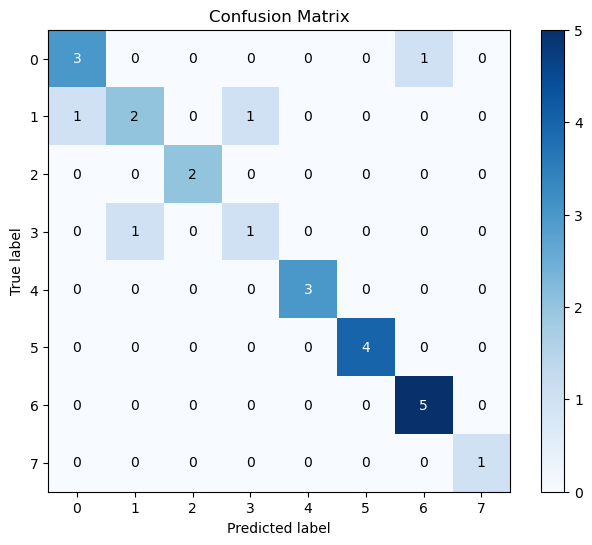

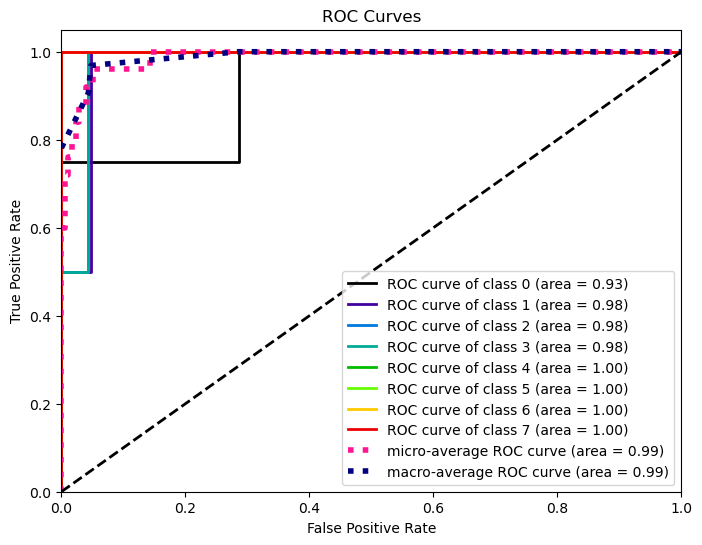

Best Hyperparameters:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
[0]	validation_0-mlogloss:2.06117
[1]	validation_0-mlogloss:2.04508
[2]	validation_0-mlogloss:2.02755
[3]	validation_0-mlogloss:2.00862
[4]	validation_0-mlogloss:1.99182
[5]	validation_0-mlogloss:1.97461
[6]	validation_0-mlogloss:1.95750
[7]	validation_0-mlogloss:1.94444
[8]	validation_0-mlogloss:1.92773
[9]	validation_0-mlogloss:1.91242
[10]	validation_0-mlogloss:1.89779
[11]	validation_0-mlogloss:1.88268
[12]	validation_0-mlogloss:1.86737
[13]	validation_0-mlogloss:1.85223
[14]	validation_0-mlogloss:1.83891
[15]	validation_0-mlogloss:1.82481
[16]	validation_0-mlogloss:1.81105
[17]	validation_0-mlogloss:1.79678
[18]	validation_0-mlogloss:1.78530
[19]	validation_0-mlogloss:1.77509
[20]	validation_0-mlogloss:1.76087
[21]	validation_0-mlogloss:1.75026
[22]	validation_0-mlogloss:1.73742
[23]	validation_0-mlogloss:1.72640
[24]	validation_0-mlogloss:1.71309
[25]	validation_0-mlogloss:1.69957

C:\Users\laure\anaconda3\envs\organoids-project\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan na

[62]	validation_0-mlogloss:1.37191
[63]	validation_0-mlogloss:1.36419
[64]	validation_0-mlogloss:1.35597
[65]	validation_0-mlogloss:1.34815
[66]	validation_0-mlogloss:1.33991
[67]	validation_0-mlogloss:1.33372
[68]	validation_0-mlogloss:1.32673
[69]	validation_0-mlogloss:1.32154
[70]	validation_0-mlogloss:1.31556
[71]	validation_0-mlogloss:1.30813
[72]	validation_0-mlogloss:1.30042
[73]	validation_0-mlogloss:1.29325
[74]	validation_0-mlogloss:1.28677
[75]	validation_0-mlogloss:1.28081
[76]	validation_0-mlogloss:1.27422
[77]	validation_0-mlogloss:1.26695
[78]	validation_0-mlogloss:1.26035
[79]	validation_0-mlogloss:1.25387
[80]	validation_0-mlogloss:1.24826
[81]	validation_0-mlogloss:1.24318
[82]	validation_0-mlogloss:1.23758
[83]	validation_0-mlogloss:1.23080
[84]	validation_0-mlogloss:1.22515
[85]	validation_0-mlogloss:1.21948
[86]	validation_0-mlogloss:1.21406
[87]	validation_0-mlogloss:1.20805
[88]	validation_0-mlogloss:1.20188
[89]	validation_0-mlogloss:1.19607
[90]	validation_0-ml

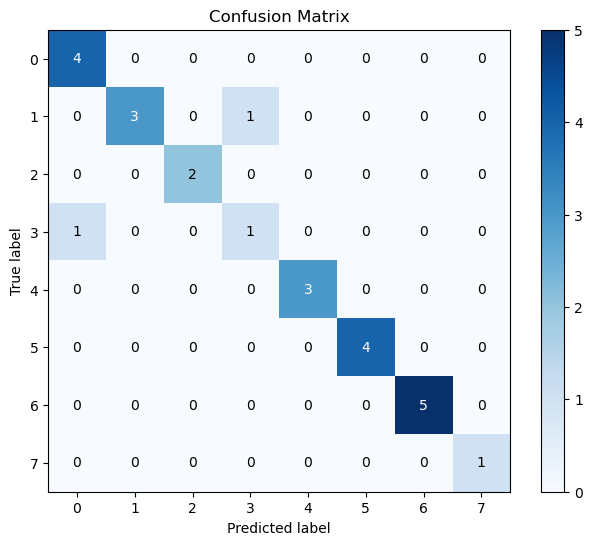

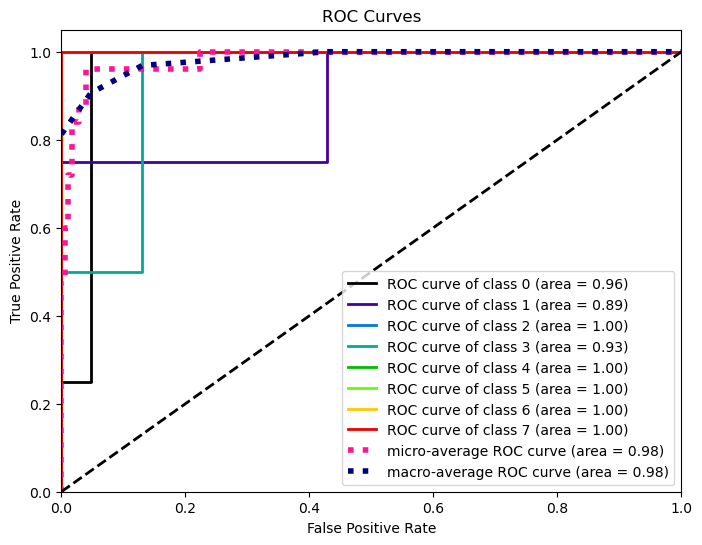

Best Hyperparameters:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
[0]	validation_0-mlogloss:2.06117
[1]	validation_0-mlogloss:2.04266
[2]	validation_0-mlogloss:2.02429
[3]	validation_0-mlogloss:2.00765
[4]	validation_0-mlogloss:1.99007
[5]	validation_0-mlogloss:1.97147
[6]	validation_0-mlogloss:1.95409
[7]	validation_0-mlogloss:1.93840
[8]	validation_0-mlogloss:1.92223
[9]	validation_0-mlogloss:1.90554
[10]	validation_0-mlogloss:1.88944
[11]	validation_0-mlogloss:1.87452
[12]	validation_0-mlogloss:1.85870
[13]	validation_0-mlogloss:1.84219
[14]	validation_0-mlogloss:1.82869
[15]	validation_0-mlogloss:1.81369
[16]	validation_0-mlogloss:1.80084
[17]	validation_0-mlogloss:1.78489
[18]	validation_0-mlogloss:1.77101
[19]	validation_0-mlogloss:1.75666
[20]	validation_0-mlogloss:1.74262
[21]	validation_0-mlogloss:1.73011
[22]	validation_0-mlogloss:1.71688
[23]	validation_0-mlogloss:1.70468
[24]	validation_0-mlogloss:1.69241
[25]	validation_0-mlogloss:1.67878

C:\Users\laure\anaconda3\envs\organoids-project\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan na

[62]	validation_0-mlogloss:1.30849
[63]	validation_0-mlogloss:1.30031
[64]	validation_0-mlogloss:1.29241
[65]	validation_0-mlogloss:1.28511
[66]	validation_0-mlogloss:1.27658
[67]	validation_0-mlogloss:1.26867
[68]	validation_0-mlogloss:1.26144
[69]	validation_0-mlogloss:1.25357
[70]	validation_0-mlogloss:1.24687
[71]	validation_0-mlogloss:1.23995
[72]	validation_0-mlogloss:1.23315
[73]	validation_0-mlogloss:1.22625
[74]	validation_0-mlogloss:1.21895
[75]	validation_0-mlogloss:1.21304
[76]	validation_0-mlogloss:1.20651
[77]	validation_0-mlogloss:1.20038
[78]	validation_0-mlogloss:1.19302
[79]	validation_0-mlogloss:1.18706
[80]	validation_0-mlogloss:1.18085
[81]	validation_0-mlogloss:1.17536
[82]	validation_0-mlogloss:1.16973
[83]	validation_0-mlogloss:1.16314
[84]	validation_0-mlogloss:1.15746
[85]	validation_0-mlogloss:1.15130
[86]	validation_0-mlogloss:1.14588
[87]	validation_0-mlogloss:1.14072
[88]	validation_0-mlogloss:1.13615
[89]	validation_0-mlogloss:1.13010
[90]	validation_0-ml

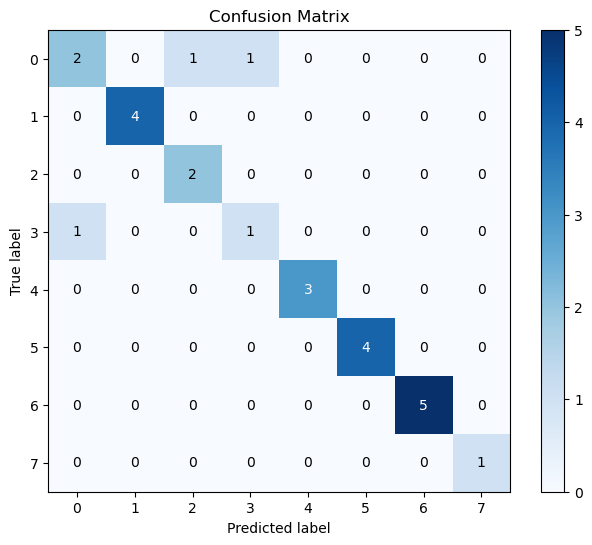

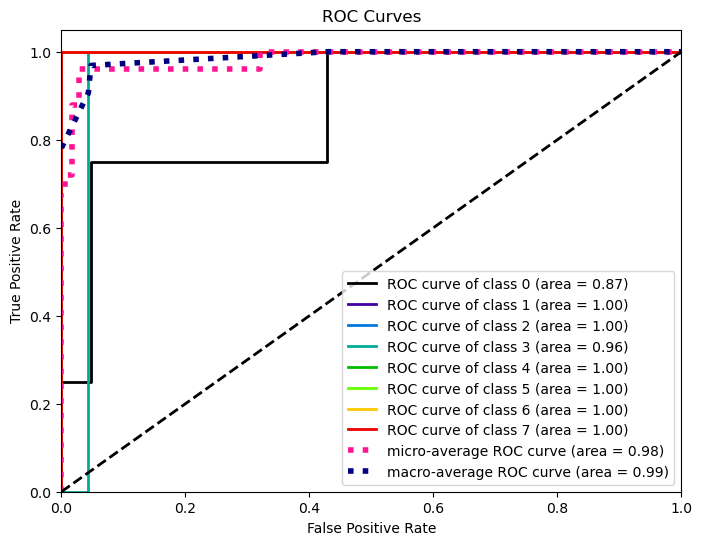

Best Hyperparameters:
{'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_sample_weight
import scikitplot as skplt

# Load data from a CSV file
data = pd.read_csv("E:/data_for_seg/statistics_features_test.csv")
# Assuming the last column is the label and the rest are features
X = data.iloc[:, 2:]
y = data.iloc[:, 1]
# Use a list for labels to ensure consistent order
unique_labels = []
seen = set()

for item in y.values:
    if item not in seen:
        unique_labels.append(item)
        seen.add(item)
        
# Extract unique labels and create a mapping from labels to integers
unique_labels = y.unique()
label_mapping = {label: i for i, label in enumerate(unique_labels)}

# Create a new Series for y with custom labels and the original indexes
y = y.map(label_mapping)

# Specify different random states
random_states = [1, 2, 3]  # Add more random states if needed

for random_state in random_states:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
    # Calculate class weights to account for imbalance
    class_weights = len(y) / (len(unique_labels) * np.bincount(y))

    # Initialize the XGBoost classifier for multiclass classification
    classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(unique_labels), verbose=False)

    param_grid = {
        'learning_rate': [0.01, 0.1, 0.2, 0.4],
        'n_estimators': [100, 200, 300, 500, 1000],
        'max_depth': [3, 4, 5, 7, 10],
        'subsample': [0.8, 0.9, 1.0],
    }

    # Create a GridSearchCV instance
    grid_search = GridSearchCV(
        estimator=classifier,
        param_grid=param_grid,
        scoring='roc_auc',
        cv=5,  # You can adjust the number of cross-validation folds
        n_jobs=-1  # Use all available CPU cores
    )

    # Train the model on the entire training set
    sample_weights = compute_sample_weight(
        class_weight='balanced',
        y=y_train  # provide your own target name
    )

    # Fit the GridSearchCV instance on the training data
    grid_search.fit(X_train, y_train, sample_weight=sample_weights, eval_set=[(X_test, y_test)])

    
    eval_auc = roc_auc_score( y_test, grid_search.best_estimator_.predict_proba(X_test), multi_class='ovr')
    
    # Assuming you have already trained the best model using grid_search

    # Plot the confusion matrix
    y_pred = grid_search.best_estimator_.predict(X_test)
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(8, 6), title="Confusion Matrix")

    # Plot ROC curves and calculate AUC
    y_probas = grid_search.best_estimator_.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas, figsize=(8, 6), title="ROC Curves")

    # Display the plots
    plt.show()
    
    best_params = grid_search.best_params_
    print("Best Hyperparameters:")
    print(best_params)
    
    """
    # Get the best parameters and best estimator from the grid search
    best_params = grid_search.best_params_
    best_classifier = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = grid_search.predict(X_test)

    # Calculate accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)

    conf_matrix = confusion_matrix(y_test, y_pred)

    # Create a heatmap for the confusion matrix with custom labels
    plt.figure(figsize=(8, 6))
    # Specify your custom labels for both rows and columns
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=unique_labels, yticklabels=unique_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Calculate ROC curve and AUC
    y_prob = grid_search.predict_proba(X_test)
    # Your code was missing the plot for ROC curve
    skplt.metrics.plot_roc(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

    # Create ROC curve plot
    plt.figure(figsize=(8, 6))
    plt.show()

    # Retrieve the names of the misclassified samples
    wellclassified_indices = np.where(y_test == y_pred)[0]
    wellclassified_samples = data.iloc[y_test.index[wellclassified_indices], 1] + ' - ' + data.iloc[y_test.index[wellclassified_indices], 0]
    show_samples(r"E:\data_for_seg", samples=wellclassified_samples, title="Correctly classified")

    misclassified_indices = np.where(y_test != y_pred)[0]
    misclassified_samples = misclassified_samples = data.iloc[y_test.index[misclassified_indices], 1] + ' - ' + data.iloc[y_test.index[misclassified_indices], 0]
    show_samples(r"E:\data_for_seg", samples=misclassified_samples, title="Misclassified")
    
    # Print the names of misclassified samples
    print("Misclassified Samples (Random State: {}):".format(random_state))
    print(misclassified_samples)

    # Print the best hyperparameters and test accuracy
    print("Best Hyperparameters:", best_params)
    print("Test Set Accuracy (using best model):", accuracy)
    """
